<a href="https://colab.research.google.com/github/afnanAlgognadi/Introduction-to-Machine-Learning/blob/main/OSAP_LogisticRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            


(2, 200)
(1, 200)


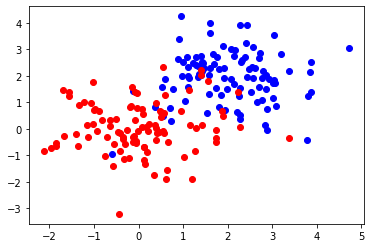

In [ ]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+2
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

X = X.T
y = y.T

z  = W X + w0

z =  X w + w0

In [ ]:
# X =[x_1, x_2, ..., x_N]

In [ ]:
y.shape

(1, 200)

In [ ]:
def get_z(X, w, b):
  return w@X+b



def sigmoid(z):
  return 1/(1+np.exp(-z))


def get_loss(y, yhat):
  return np.sum(-y*np.log(yhat)-(1-y)*np.log(1-yhat), axis = 1)

In [ ]:
ni = X.shape[0]
no = y.shape[0]

w = np.random.randn(no,ni)
b = 0


Z = get_z(X,w,b)
print(Z.shape)

yhat = sigmoid(Z)

loss = get_loss(y,yhat)
print(loss)

In [ ]:
lr = 1e-4
ls = []
bs = 10
for i in range(10000):
  # dJ / d yhat ---> dyhat
  # dJ / dz  ----> dz
  # dJ / dw ----> dw
  # dJ / db.-----> db
  
  # forward pass

  loss = get_loss(y,yhat)
  ls.append(loss)


  #backward pass
  dz = yhat -y

  #dJ/dw = [dJ/dyhat * dyhat/z] * dz/dw
  #dJ/dw = [dz] *dz/dw
  #dz/dw = X.T

  dw = dz @ X.T
  db = np.sum(dz, axis =1, keepdims= True)


  # weights update

  w-= lr*dw
  b-= lr*db

plt.plot(ls)

In [ ]:
X.shape

(200, 2)

dz ---> [1, 200] [200,2]

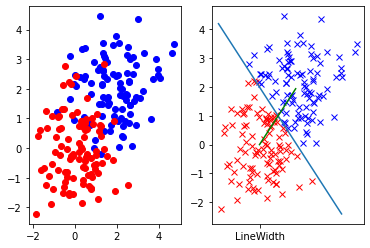

In [ ]:
plt.figure()
plt.subplot(121)
plotClass(X,y,'o')
plt.subplot(122)
plotClass(X,yhat>0.5,'x')
#w1*x1+w2*x2+b=0
x1 = np.linspace(-2,4, 10)
x2 = (-b - w[0,0]*x1)/w[0,1]
plt.plot(x1,x2.squeeze())
plt.plot([0, w[0,1]], [0,w[0,0]],'g', 'LineWidth',4)

In [ ]:
print(X.shape, y.shape)

(200, 2) (200, 1)


In [ ]:
def get_z(X, w, b):
  return X@w+b



def sigmoid(z):
  return 1/(1+np.exp(-z))


def get_loss(y, yhat):
  return np.sum(-y*np.log(yhat)-(1-y)*np.log(1-yhat), axis = 0)

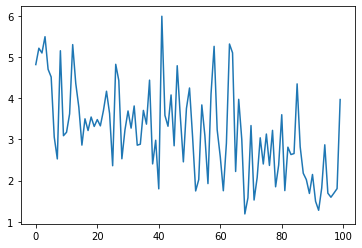

In [ ]:
ni = X.shape[1]
no = y.shape[1]

w = np.random.randn(ni, no)
b = 0

bs =8
lr = 1e-4
ls = []
vw = 0
vb = 0
mu = 0.5
for i in range(10000):
  # dJ / d yhat ---> dyhat
  # dJ / dz  ----> dz
  # dJ / dw ----> dw
  # dJ / db.-----> db
  ind = np.random.randint(0, X.shape[0], bs )
  Xb = X[ind,:]
  yb = y[ind,:]
  Z = get_z(Xb,w,b)
  yhat = sigmoid(Z)
  # forward pass
  Z = get_z(Xb,w,b)
  yhat = sigmoid(Z)
  loss = get_loss(yb,yhat)
  if i%100==0:
    ls.append(loss)


  #backward pass
  dz = yhat -yb

  #dJ/dw = [dJ/dyhat * dyhat/z] * dz/dw
  #dJ/dw = [dz] *dz/dw
  #dz/dw = X.T

  dw = Xb.T@dz 
  db = np.sum(dz, axis =0, keepdims= True)


  # weights update
  vw = mu*vw - (1-mu)*lr*dw
  vb = mu*vb - (1-mu)*lr*db
  w+= vw
  b+= vb
  #w-= lr*dw
  #b-= lr*db

plt.plot(ls)

In [ ]:
vw

array([[-1.17850184e-05],
       [-4.31028919e-05]])

In [ ]:
# dz --->(200,1).  X.T---->(2,200) ----> X.T@dz. --->(2,1)

In [ ]:
!nvidia-smi

Mon Aug 15 11:03:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
X = X.T
y = y.T

In [ ]:
print(y.shape)

(200, 1)


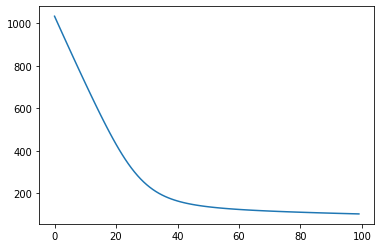

In [ ]:
def get_z(X,w,b):
  return X@w+b

def sigmoid(z):
  return 1/(1+np.exp(-z))


def get_loss(y, yhat):
  return np.sum(-y*np.log(yhat) - (1 - y )*np.log(1-yhat), axis =0)



w = np.random.randn(X.shape[1], y.shape[1])
b = np.zeros((y.shape[1],1))

lr =1e-4

ls = []
for i in range(100):
  z = get_z(X,w,b)
  yhat = sigmoid(z)
  loss = get_loss(y, yhat)


  dz = yhat - y
  dw = X.T@dz
  db = np.sum(dz, keepdims = True)

  w-=lr*dw
  b-=lr*db

  ls.append(loss)

plt.plot(ls)

In [ ]:
db.shape


(1, 1)